# Information

**Shark Tank India is an Indian business reality television series that airs on SET India. The show is the Indian franchise of the American show Shark Tank. It shows entrepreneurs making business presentations to a panel of investors or sharks, who decide whether to invest in their company. The first season of Shark Tank India premiered from 20 December 2021 to 4 February 2022.**


# Concept

**The show features a panel of potential investors, termed as "Sharks", who listen to entrepreneurs pitch ideas for a business or product they wish to develop. These self-made multi-millionaires judge the business concepts and products pitched and then decide whether to invest their own money to help market and mentor each contestant. The host of this show is Rannvijay Singha.**

**The show received 62,000 aspirants from India, out of which 198 businesses were selected to pitch their ideas to the “sharks”.Out of 198 investment pitches at the reality TV show, 65 (67 claimed by Shark Tank India) businesses got deals this season.**

# Sharks

**Any five of the following seven sharks are present in each episode except episodes 34-35.[2]

### Shark	  -           Company
**Ashneer Grover  -	  Managing Director and Co-founder of BharatPe**

**Aman Gupta	  -   Co-founder and Chief Marketing Officer of boAt**

**Anupam Mittal   -	  Founder and CEO of Shaadi.com and People Group**

**Ghazal Alagh	  -    Co-founder and Chief Mama of MamaEarth**

**Namita Thapar	  -    Executive Director of Emcure Pharmaceuticals**

**Peyush Bansal	  -   Co-founder and CEO of Lenskart**

**Vineeta Singh	  -    CEO and co-founder of SUGAR Cosmetics**


## Import Necessary Libraries

In [273]:
#! pip install plotly==5.6.0

In [274]:
import pandas as pd 
from matplotlib import pyplot as plt 
import numpy as np
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.model_selection import train_test_split
from matplotlib.figure import Figure


%matplotlib inline 


import warnings 
warnings.filterwarnings('ignore')

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly import tools
from plotly.offline import iplot

## pio.templates.default = "plotly_dark" ## only if we want dark background 

### Usage of these function

**%matplotlib inline - Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.**

**plotly - The plotly Python package exists to create, manipulate and render graphical figures (i.e. charts, plots, maps and diagrams) represented by data structures also referred to as figures.**

**ax = When we plot something using plt such as plt. line(...) , we implicitly created a Figure instance and an Axes inside the Figure object**

In [225]:
data = pd.read_csv('ShartankIndiaAllPitches.csv')
data

,Episode Number,Pitch Number,Brand,Idea,Investment Amount (In Lakhs INR),Debt (In lakhs INR),Equity,Anupam,Ashneer,Namita,Aman,Peyush,Vineeta,Ghazal,Season
0,1,1,BluePine Industries,Frozen Momos,75,0,18%,N,Y,N,Y,N,Y,N,1
1,1,2,Booz scooters,Renting e-bike for mobility in private spaces,40,0,50%,N,Y,N,N,N,Y,N,1
2,1,3,Heart up my Sleeves,Detachable Sleeves,25,0,30%,Y,N,N,N,N,Y,N,1
3,2,4,Tagz Foods,Healthy Potato Chips,70,0,2.75%,N,Y,N,N,N,N,N,1
4,2,5,Head and Heart,Brain Development Course,0,0,0,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,34,113,Green Protein,Plant-Based Protein,0,0,0,N,N,N,N,N,N,N,1
113,34,114,On2Cook,Fastest Cooking Device,0,0,0,N,N,N,N,N,N,N,1
114,35,115,Jain Shikanji,Lemonade,40,0,30.00%,Y,Y,N,Y,N,Y,N,1
115,35,116,Woloo,Washroom Finder,0,0,0,N,N,N,N,N,N,N,1


In [209]:
data.shape

(117, 15)

In [230]:
data.rename(columns={'Episode Number' : 'Episode',
                        'Pitch Number': 'Pitch_No',
                        'Debt (In lakhs INR)' :'Debt_amnt'},
               
              inplace= True)

In [231]:
data

,Episode,Pitch_No,Brand,Idea,Invested_Amount,Debt_amnt,Equity,Anupam,Ashneer,Namita,Aman,Peyush,Vineeta,Ghazal,Season
0,1,1,BluePine Industries,Frozen Momos,75,0,18%,N,Y,N,Y,N,Y,N,1
1,1,2,Booz scooters,Renting e-bike for mobility in private spaces,40,0,50%,N,Y,N,N,N,Y,N,1
2,1,3,Heart up my Sleeves,Detachable Sleeves,25,0,30%,Y,N,N,N,N,Y,N,1
3,2,4,Tagz Foods,Healthy Potato Chips,70,0,2.75%,N,Y,N,N,N,N,N,1
4,2,5,Head and Heart,Brain Development Course,0,0,0,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,34,113,Green Protein,Plant-Based Protein,0,0,0,N,N,N,N,N,N,N,1
113,34,114,On2Cook,Fastest Cooking Device,0,0,0,N,N,N,N,N,N,N,1
114,35,115,Jain Shikanji,Lemonade,40,0,30.00%,Y,Y,N,Y,N,Y,N,1
115,35,116,Woloo,Washroom Finder,0,0,0,N,N,N,N,N,N,N,1


In [232]:
data.columns

Index(['Episode', 'Pitch_No', 'Brand', 'Idea', 'Invested_Amount', 'Debt_amnt',
       'Equity', 'Anupam', 'Ashneer', 'Namita', 'Aman', 'Peyush', 'Vineeta',
       'Ghazal', 'Season'],
      dtype='object')

In [233]:
data.isna().sum()

Episode            0
Pitch_No           0
Brand              0
Idea               0
Invested_Amount    0
Debt_amnt          0
Equity             0
Anupam             0
Ashneer            0
Namita             0
Aman               0
Peyush             0
Vineeta            0
Ghazal             0
Season             0
dtype: int64

In [234]:
data.describe()

,Episode,Pitch_No,Invested_Amount,Debt_amnt,Season
count,117.000000,117.000000,117.000000,117.000000,117.0
mean,18.735043,59.000000,21.683761,2.572650,1.0
std,10.070778,33.919021,26.067766,11.544753,0.0
min,1.000000,1.000000,0.000000,0.000000,1.0
25%,10.000000,30.000000,0.000000,0.000000,1.0
50%,19.000000,59.000000,10.000000,0.000000,1.0
75%,27.000000,88.000000,50.000000,0.000000,1.0
max,35.000000,117.000000,80.000000,99.000000,1.0


In [235]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Episode          117 non-null    int64 
 1   Pitch_No         117 non-null    int64 
 2   Brand            117 non-null    object
 3   Idea             117 non-null    object
 4   Invested_Amount  117 non-null    int64 
 5   Debt_amnt        117 non-null    int64 
 6   Equity           117 non-null    object
 7   Anupam           117 non-null    object
 8   Ashneer          117 non-null    object
 9   Namita           117 non-null    object
 10  Aman             117 non-null    object
 11  Peyush           117 non-null    object
 12  Vineeta          117 non-null    object
 13  Ghazal           117 non-null    object
 14  Season           117 non-null    int64 
dtypes: int64(5), object(10)
memory usage: 13.8+ KB


In [237]:
display(data.describe(),data.describe(include='object'))

,Episode,Pitch_No,Invested_Amount,Debt_amnt,Season
count,117.000000,117.000000,117.000000,117.000000,117.0
mean,18.735043,59.000000,21.683761,2.572650,1.0
std,10.070778,33.919021,26.067766,11.544753,0.0
min,1.000000,1.000000,0.000000,0.000000,1.0
25%,10.000000,30.000000,0.000000,0.000000,1.0
50%,19.000000,59.000000,10.000000,0.000000,1.0
75%,27.000000,88.000000,50.000000,0.000000,1.0
max,35.000000,117.000000,80.000000,99.000000,1.0


,Brand,Idea,Equity,Anupam,Ashneer,Namita,Aman,Peyush,Vineeta,Ghazal
count,117,117,117,117,117,117,117,117,117,117
unique,117,117,39,2,2,2,2,2,2,2
top,Vivalyf Innovations- Easy Life,Ayurvedic Products,0,N,N,N,N,N,N,N
freq,1,1,52,93,96,95,89,90,102,110


In [238]:
data.rename(columns={"Investment Amount (In Lakhs INR) " : "Invested_Amount"},inplace=True)

In [229]:
data.columns

Index(['Episode Number', 'Pitch Number', 'Brand', 'Idea', 'Invested_Amount',
       'Debt (In lakhs INR)', 'Equity', 'Anupam', 'Ashneer', 'Namita', 'Aman',
       'Peyush', 'Vineeta', 'Ghazal', 'Season'],
      dtype='object')

In [239]:
data.head()

,Episode,Pitch_No,Brand,Idea,Invested_Amount,Debt_amnt,Equity,Anupam,Ashneer,Namita,Aman,Peyush,Vineeta,Ghazal,Season
0,1,1,BluePine Industries,Frozen Momos,75,0,18%,N,Y,N,Y,N,Y,N,1
1,1,2,Booz scooters,Renting e-bike for mobility in private spaces,40,0,50%,N,Y,N,N,N,Y,N,1
2,1,3,Heart up my Sleeves,Detachable Sleeves,25,0,30%,Y,N,N,N,N,Y,N,1
3,2,4,Tagz Foods,Healthy Potato Chips,70,0,2.75%,N,Y,N,N,N,N,N,1
4,2,5,Head and Heart,Brain Development Course,0,0,0,N,N,N,N,N,N,N,1


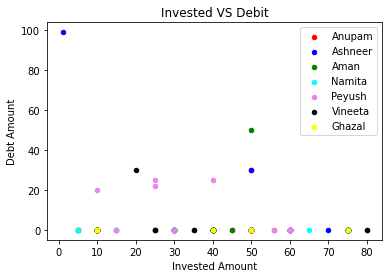

In [241]:
fig=data[data.Anupam=="Y"].plot(kind="scatter",x='Invested_Amount',y="Debt_amnt",color="red",label="Anupam")
data[data.Ashneer=="Y"].plot(kind="scatter",x='Invested_Amount',y="Debt_amnt",color="blue",label="Ashneer",ax=fig)
data[data.Aman=="Y"].plot(kind="scatter",x='Invested_Amount',y="Debt_amnt",color="green",label="Aman",ax=fig)
data[data.Namita=="Y"].plot(kind="scatter",x='Invested_Amount' ,y="Debt_amnt",color="cyan",label="Namita",ax=fig)
data[data.Peyush=="Y"].plot(kind="scatter",x='Invested_Amount',y="Debt_amnt",color="violet",label="Peyush",ax=fig)
data[data.Vineeta=="Y"].plot(kind="scatter",x='Invested_Amount',y="Debt_amnt",color="black",label="Vineeta",ax=fig)
data[data.Ghazal=="Y"].plot(kind="scatter",x='Invested_Amount',y="Debt_amnt",color="yellow",label="Ghazal",ax=fig)

plt.xlabel('Invested Amount') ## or #fig.set_xlabel(label name ) 
plt.ylabel('Debt Amount') ## or # fig.set_ylabel(label name )
plt.title('Invested VS Debit') ##or fig.set_title("title name )
plt.show()

In [242]:
anupam=data[data.Anupam=="Y"]
anupam.head()

,Episode,Pitch_No,Brand,Idea,Invested_Amount,Debt_amnt,Equity,Anupam,Ashneer,Namita,Aman,Peyush,Vineeta,Ghazal,Season
2,1,3,Heart up my Sleeves,Detachable Sleeves,25,0,30%,Y,N,N,N,N,Y,N,1
9,4,10,Cosiq,Intelligent Skincare,50,0,25%,Y,N,N,N,N,Y,N,1
12,5,13,Revamp Moto,E-Bike,10,0,1.50%,Y,N,N,Y,N,N,N,1
15,6,16,Skippi Pops,Ice-Pops,10,0,15%,Y,Y,Y,Y,N,Y,N,1
22,8,23,Vivalyf Innovations- Easy Life,Prickless Diabetes Testing Machine,56,0,33.30%,Y,N,N,N,Y,N,N,1


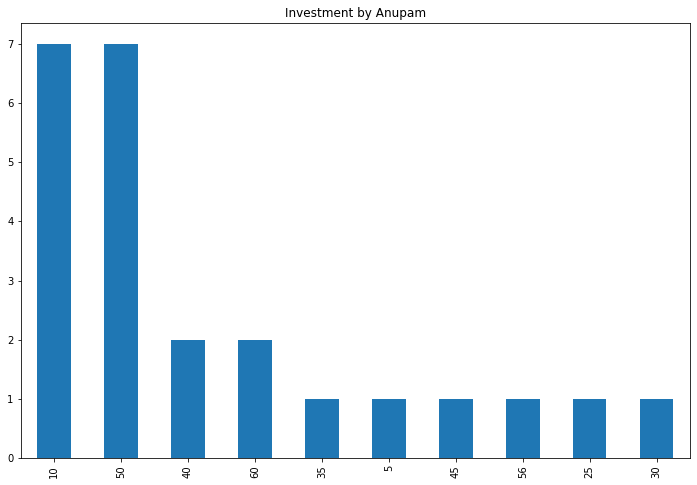

In [305]:
anupam=data[data.Anupam=="Y"]


plt.figure(figsize=(12,8))
anupam['Invested_Amount'].value_counts().plot(kind="bar",title="Investment by Anupam")
plt.show()

In [244]:
anupam['Invested_Amount'].sum()

816

In [245]:
aman = data[data.Aman == 'Y']
aman.head()

,Episode,Pitch_No,Brand,Idea,Invested_Amount,Debt_amnt,Equity,Anupam,Ashneer,Namita,Aman,Peyush,Vineeta,Ghazal,Season
0,1,1,BluePine Industries,Frozen Momos,75,0,18%,N,Y,N,Y,N,Y,N,1
7,3,8,Peeschute,Disposable Urine Bag,75,0,6%,N,N,N,Y,N,N,N,1
11,4,12,Bummer,Underwear,75,0,7.50%,N,N,Y,Y,N,N,N,1
12,5,13,Revamp Moto,E-Bike,10,0,1.50%,Y,N,N,Y,N,N,N,1
15,6,16,Skippi Pops,Ice-Pops,10,0,15%,Y,Y,Y,Y,N,Y,N,1


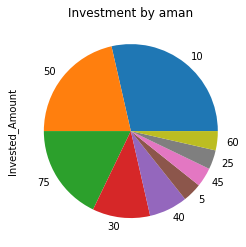

In [247]:
aman = data[data.Aman == 'Y']
aman['Invested_Amount'].value_counts().plot(kind = 'pie', title = 'Investment by aman')
plt.show()

In [248]:
aman['Invested_Amount'].sum()

1060

In [249]:
ashneer = data[data.Ashneer == 'Y']
ashneer.head()

,Episode,Pitch_No,Brand,Idea,Invested_Amount,Debt_amnt,Equity,Anupam,Ashneer,Namita,Aman,Peyush,Vineeta,Ghazal,Season
0,1,1,BluePine Industries,Frozen Momos,75,0,18%,N,Y,N,Y,N,Y,N,1
1,1,2,Booz scooters,Renting e-bike for mobility in private spaces,40,0,50%,N,Y,N,N,N,Y,N,1
3,2,4,Tagz Foods,Healthy Potato Chips,70,0,2.75%,N,Y,N,N,N,N,N,1
15,6,16,Skippi Pops,Ice-Pops,10,0,15%,Y,Y,Y,Y,N,Y,N,1
18,7,19,Raising Superstars,Child Development App,10,0,4%,N,Y,N,Y,N,N,N,1


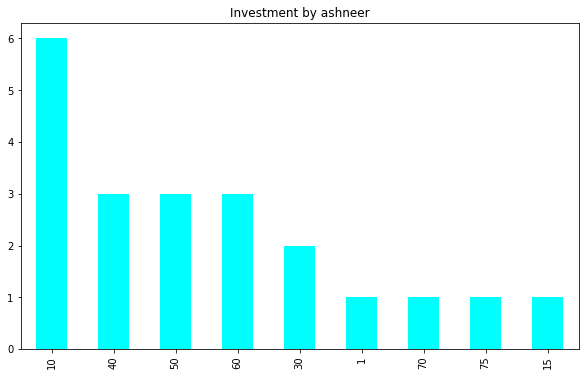

In [250]:
ashneer = data[data.Ashneer == 'Y']
plt.figure(figsize=(10,6))
ashneer['Invested_Amount'].value_counts().plot(kind = 'bar', title = 'Investment by ashneer', color = 'cyan')
plt.show()

In [251]:
ashneer['Invested_Amount'].sum()

731

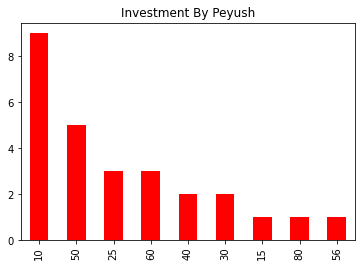

In [252]:
peyush = data[data.Peyush == 'Y']
peyush['Invested_Amount'].value_counts().plot(kind = 'bar', title = 'Investment By Peyush',color = 'red')
plt.show()

In [253]:
peyush['Invested_Amount'].sum()

886

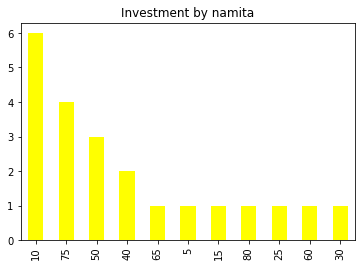

In [254]:
namita = data[data.Namita == 'Y']
namita['Invested_Amount'].value_counts().plot(kind = 'bar', title = 'Investment by namita', color = 'yellow')
plt.show()

<AxesSubplot:title={'center':'Investment by ghazal'}>

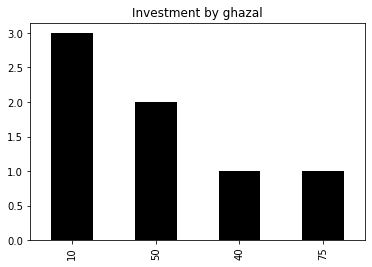

In [255]:
ghazal = data[data.Ghazal=='Y']
ghazal['Invested_Amount'].value_counts().plot(kind = 'bar', title = 'Investment by ghazal',color = 'black')

In [304]:
ghazal['Invested_Amount'].sum()

245

<AxesSubplot:title={'center':'Investment by vineeta'}>

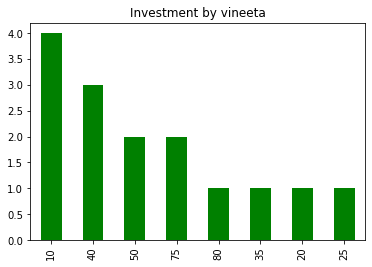

In [256]:
vineeta = data[data.Vineeta == 'Y']
vineeta['Invested_Amount'].value_counts().plot(kind = 'bar', title = 'Investment by vineeta', color = 'green')

In [263]:
vineeta['Invested_Amount'].sum()

570

In [261]:
fig=px.bar(anupam,x="Equity",y='Invested_Amount')
fig.show()

In [258]:
pio.templates.default = "plotly_dark"
fig=px.bar(aman,x="Equity",y='Invested_Amount')
fig.show()


In [259]:
fig = px.bar(ashneer, x ="Equity", y = 'Invested_Amount')
fig.show()

In [260]:
aman['Equity'].describe()

count         28
unique        21
top       10.00%
freq           3
Name: Equity, dtype: object

In [270]:
x = data.sort_values('Invested_Amount', ascending =False)


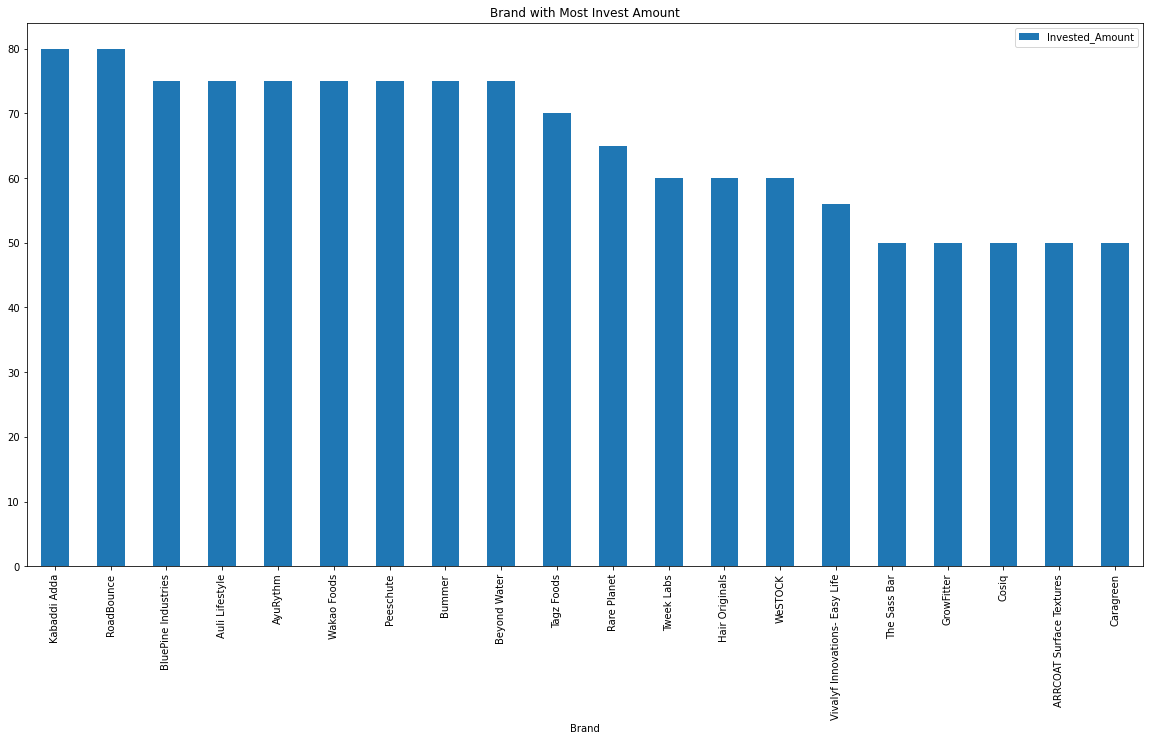

In [272]:
x[:20].plot(kind="bar",x="Brand",y='Invested_Amount',figsize=(20,10),title="Brand with Most Invest Amount")
None 

**None is the function which we used like we use plt.show(). None is work same as Plt.show()**

In [284]:
fig = px.bar(x[:20], x= 'Brand', y = 'Invested_Amount', color= 'Brand' , title='Top Brand With Most Investment')
fig

In [298]:
y = data.sort_values('Debt_amnt', ascending=False)
fig = px.bar(y[:8], x = 'Brand', y = 'Debt_amnt', color = 'Brand', title = 'Debt Amount In Brand')
fig.show()

In [303]:
figure1 = px.bar(anupam,   x ="Equity", y='Invested_Amount', color="Brand",title="Total equity of Anupam")
figure1.show()
figure2 = px.bar(aman,     x= 'Equity', y='Invested_Amount', color='Brand',title='Total equity of Aman')
figure2.show()
figure3 = px.bar(ashneer,  x ='Equity', y='Invested_Amount', color='Brand',title='Total equity of Ashneer')
figure3.show()
figure4 = px.bar(peyush,   x ='Equity', y='Invested_Amount', color='Brand',title='Total equity of Peyush')
figure4.show()
figure5 = px.bar(namita,   x ='Equity', y='Invested_Amount', color='Brand',title='Total equity of Namita')
figure5.show()
figure6 = px.bar(ghazal,   x ='Equity', y='Invested_Amount', color='Brand',title='Total equity of Ghazal')
figure6.show()
figure7 = px.bar(vineeta,  x ='Equity', y='Invested_Amount', color='Brand',title='Total equity of Vineeta')
figure7.show()

## conclusion from the given data

**Ghazal is the only shark who never invested with any other shark**

**Aman invested more money rather than any other shark**
